In [1]:
from datetime import datetime
import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 定数
TEST_SIZE = 0.2
RANDOM_STATE = 123
MIN_SAMPLES_LEAF = 10

% matplotlib inline

In [4]:
# レース結果のCSVファイルを取り込む(5年分)
import_df = pd.read_csv('taraining_data_12-16.csv')
import_df.head(6)

,RACE_ID,RACE_DATE,RACE_COURSE,COURSE,WEATHER,TRACK,DISTANCE,PRIZE1,HORSE_NAME,FRAME,...,DISTANCE_RANK_4,DISTANCE_RANK_5,DISTANCE_AVG_L3F_TIME,DISTANCE_AVG_STD_DEV,STD_DEV,RACE_TIME,AVG_RACE_TIME,RANK,POPULARITY,ODDS
0,1206010103,2012/01/05,12,2,1,1,1200,500,タンブルブルータス,1,...,2,0,37.250000,48.496892,49.979870,73.5,73.496247,2.0,2,4.6
1,1206010101,2012/01/05,12,2,1,1,1200,500,フロムクローバーズ,1,...,0,0,35.700000,47.708447,39.788080,75.4,73.496247,13.0,9,31.0
2,1208010104,2012/01/05,12,2,1,1,1200,720,グランマルシェ,1,...,0,0,0.000000,0.000000,52.836277,73.2,73.705593,8.0,10,41.9
3,1206010107,2012/01/05,12,2,1,1,1200,720,リックムファサ,1,...,0,0,37.200000,51.226782,56.416791,72.3,73.496247,1.0,7,26.1
4,1206010110,2012/01/05,12,2,1,1,1200,1700,レッドヴァンクール,1,...,1,0,36.615385,58.043113,60.171661,71.6,73.496247,7.0,5,11.4
5,1208010101,2012/01/05,12,2,2,1,1200,500,シゲルキンカン,1,...,0,0,35.475000,44.604306,41.616678,75.2,73.705593,8.0,11,163.9


In [5]:
# CSVファイルの確認
print('Total: {}件'.format(len(import_df.index)))

Total: 248322件


In [6]:
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['STD_DEV'] = import_df['STD_DEV']

# ２．説明変数の設定
# training_df['RACE_ID'] = import_df['RACE_ID']
# training_df['RACE_DATE'] = import_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
training_df['RACE_COURSE'] = import_df['RACE_COURSE']
training_df['COURSE'] = import_df['COURSE']
# training_df['WEATHER'] = import_df['WEATHER']
# training_df['TRACK'] = import_df['TRACK']
training_df['DISTANCE'] = import_df['DISTANCE']
training_df['PRIZE1'] = import_df['PRIZE1']
# training_df['HORSE_NAME'] = import_df['HORSE_NAME']
training_df['FRAME'] = import_df['FRAME']
training_df['NUM'] = import_df['NUM']
training_df['GENDER'] = import_df['GENDER']
training_df['AGE'] = import_df['AGE']
training_df['JOCKEY_ID'] = import_df['JOCKEY_ID']
training_df['TRAINER_ID'] = import_df['TRAINER_ID']
training_df['CNT'] = import_df['CNT']
training_df['RANK_1'] = import_df['RANK_1']
training_df['RANK_2'] = import_df['RANK_2']
training_df['RANK_3'] = import_df['RANK_3']
training_df['RANK_4'] = import_df['RANK_4']
training_df['RANK_5'] = import_df['RANK_5']
training_df['AVG_L3F_TIME'] = import_df['AVG_L3F_TIME']
training_df['AVG_STD_DEV'] = import_df['AVG_STD_DEV']
training_df['RACE_SPAN1'] = import_df['RACE_SPAN1']
training_df['RACE_SPAN2'] = import_df['RACE_SPAN2']
training_df['RACE_SPAN3'] = import_df['RACE_SPAN3']
training_df['STD_DEV_LAST_1'] = import_df['STD_DEV_LAST_1']
training_df['STD_DEV_LAST_2'] = import_df['STD_DEV_LAST_2']
training_df['STD_DEV_LAST_3'] = import_df['STD_DEV_LAST_3']
training_df['STD_DEV_LAST_4'] = import_df['STD_DEV_LAST_4']
training_df['STD_DEV_LAST_5'] = import_df['STD_DEV_LAST_5']
training_df['AVG_L3F_TIME_LAST_5'] = import_df['AVG_L3F_TIME_LAST_5']
training_df['AVG_STD_DEV_LAST_5'] = import_df['AVG_STD_DEV_LAST_5']
training_df['RACE_COURSE_CNT'] = import_df['RACE_COURSE_CNT']
training_df['RACE_COURSE_RANK_1'] = import_df['RACE_COURSE_RANK_1']
training_df['RACE_COURSE_RANK_2'] = import_df['RACE_COURSE_RANK_2']
training_df['RACE_COURSE_RANK_3'] = import_df['RACE_COURSE_RANK_3']
training_df['RACE_COURSE_RANK_4'] = import_df['RACE_COURSE_RANK_4']
training_df['RACE_COURSE_RANK_5'] = import_df['RACE_COURSE_RANK_5']
training_df['RACE_COURSE_AVG_L3F_TIME'] = import_df['RACE_COURSE_AVG_L3F_TIME']
training_df['RACE_COURSE_AVG_STD_DEV'] = import_df['RACE_COURSE_AVG_STD_DEV']
training_df['COURSE_CNT'] = import_df['COURSE_CNT']
training_df['COURSE_RANK_1'] = import_df['COURSE_RANK_1']
training_df['COURSE_RANK_2'] = import_df['COURSE_RANK_2']
training_df['COURSE_RANK_3'] = import_df['COURSE_RANK_3']
training_df['COURSE_RANK_4'] = import_df['COURSE_RANK_4']
training_df['COURSE_RANK_5'] = import_df['COURSE_RANK_5']
training_df['COURSE_AVG_L3F_TIME'] = import_df['COURSE_AVG_L3F_TIME']
training_df['COURSE_AVG_STD_DEV'] = import_df['COURSE_AVG_STD_DEV']
training_df['DISTANCE_CNT'] = import_df['DISTANCE_CNT']
training_df['DISTANCE_RANK_1'] = import_df['DISTANCE_RANK_1']
training_df['DISTANCE_RANK_2'] = import_df['DISTANCE_RANK_2']
training_df['DISTANCE_RANK_3'] = import_df['DISTANCE_RANK_3']
training_df['DISTANCE_RANK_4'] = import_df['DISTANCE_RANK_4']
training_df['DISTANCE_RANK_5'] = import_df['DISTANCE_RANK_5']
training_df['DISTANCE_AVG_L3F_TIME'] = import_df['DISTANCE_AVG_L3F_TIME']
training_df['DISTANCE_AVG_STD_DEV'] = import_df['DISTANCE_AVG_STD_DEV']


# ３．テストデータで学習
feature = training_df.ix[:, 'RACE_COURSE':]
correct = training_df['STD_DEV']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestRegressor(
    n_estimators=500, 
    max_depth=50,
    min_samples_split=50,
    random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
# 予測値を計算
y_train_pred = rfc.predict(training_feature)
y_test_pred = rfc.predict(test_feature)
# 平均二乗誤差(MSE)の計算
print('MSE train : %.3f, test : %.3f'
      % (mean_squared_error(traininig_correct, y_train_pred), mean_squared_error(test_correct, y_test_pred)))
# 決定係数(R2)の計算
print('R2 train : %.3f, test : %.3f'
      % (r2_score(traininig_correct, y_train_pred), r2_score(test_correct, y_test_pred)))

学習: 198657件 (80.00%)
テスト: 49665件 (20.00%)


MSE train : 34.665, test : 51.367
R2 train : 0.653, test : 0.479


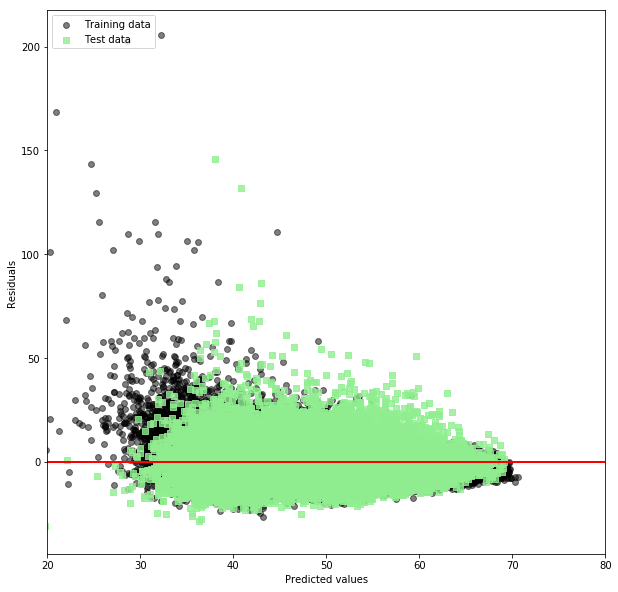

In [7]:
# 残差を可視化
pyplot.figure(figsize = (10, 10))
pyplot.scatter(y_train_pred, y_train_pred - traininig_correct, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
pyplot.scatter(y_test_pred, y_test_pred - test_correct, c = 'lightgreen', marker = 's', s = 35, alpha = 0.8, label = 'Test data')
pyplot.xlabel('Predicted values')
pyplot.ylabel('Residuals')
pyplot.legend(loc = 'upper left')
pyplot.hlines(y = 0, xmin = 20, xmax = 80, lw = 2, color = 'red')
pyplot.xlim([20, 80])
pyplot.show()

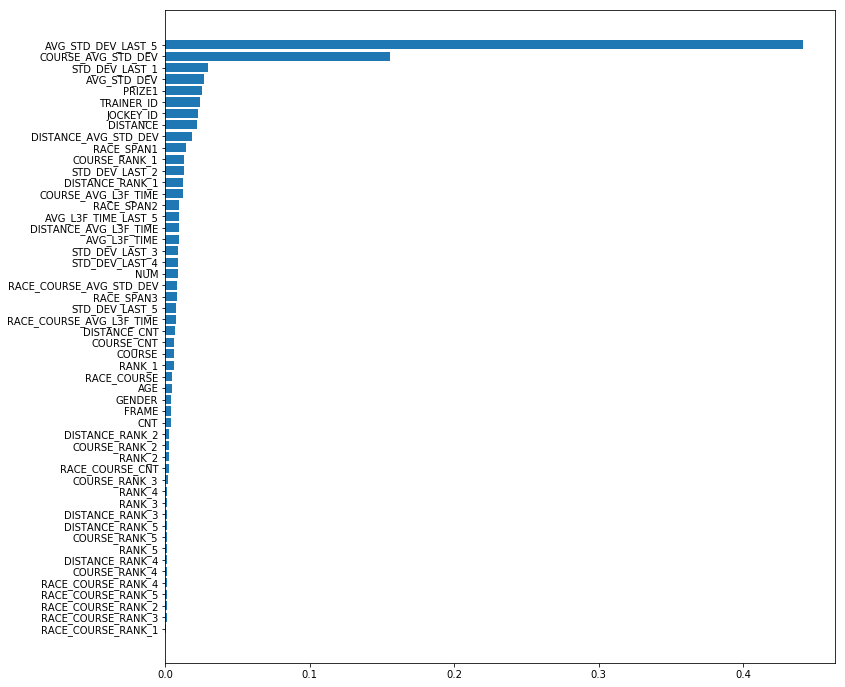

In [8]:
# 作成したモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)
pyplot.show()

In [16]:
# レースファイルの取りこみ
import_prediction_df = pd.read_csv('yosou_2017_all.csv')

# 予想データの作成
prediction_df = pd.DataFrame()

# 説明変数の設定
# prediction_df['RACE_ID'] = import_prediction_df['RACE_ID']
# prediction_df['RACE_DATE'] = import_prediction_df['RACE_DATE'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d").timestamp())
prediction_df['RACE_COURSE'] = import_prediction_df['RACE_COURSE']
prediction_df['COURSE'] = import_prediction_df['COURSE']
# prediction_df['WEATHER'] = import_prediction_df['WEATHER']
# prediction_df['TRACK'] = import_prediction_df['TRACK']
prediction_df['DISTANCE'] = import_prediction_df['DISTANCE']
prediction_df['PRIZE1'] = import_prediction_df['PRIZE1']
# prediction_df['HORSE_NAME'] = import_prediction_df['HORSE_NAME']
prediction_df['FRAME'] = import_prediction_df['FRAME']
prediction_df['NUM'] = import_prediction_df['NUM']
prediction_df['GENDER'] = import_prediction_df['GENDER']
prediction_df['AGE'] = import_prediction_df['AGE']
prediction_df['JOCKEY_ID'] = import_prediction_df['JOCKEY_ID']
prediction_df['TRAINER_ID'] = import_prediction_df['TRAINER_ID']
prediction_df['CNT'] = import_prediction_df['CNT']
prediction_df['RANK_1'] = import_prediction_df['RANK_1']
prediction_df['RANK_2'] = import_prediction_df['RANK_2']
prediction_df['RANK_3'] = import_prediction_df['RANK_3']
prediction_df['RANK_4'] = import_prediction_df['RANK_4']
prediction_df['RANK_5'] = import_prediction_df['RANK_5']
prediction_df['AVG_L3F_TIME'] = import_prediction_df['AVG_L3F_TIME']
prediction_df['AVG_STD_DEV'] = import_prediction_df['AVG_STD_DEV']
prediction_df['RACE_SPAN1'] = import_prediction_df['RACE_SPAN1']
prediction_df['RACE_SPAN2'] = import_prediction_df['RACE_SPAN2']
prediction_df['RACE_SPAN3'] = import_prediction_df['RACE_SPAN3']
prediction_df['STD_DEV_LAST_1'] = import_prediction_df['STD_DEV_LAST_1']
prediction_df['STD_DEV_LAST_2'] = import_prediction_df['STD_DEV_LAST_2']
prediction_df['STD_DEV_LAST_3'] = import_prediction_df['STD_DEV_LAST_3']
prediction_df['STD_DEV_LAST_4'] = import_prediction_df['STD_DEV_LAST_4']
prediction_df['STD_DEV_LAST_5'] = import_prediction_df['STD_DEV_LAST_5']
prediction_df['AVG_L3F_TIME_LAST_5'] = import_prediction_df['AVG_L3F_TIME_LAST_5']
prediction_df['AVG_STD_DEV_LAST_5'] = import_prediction_df['AVG_STD_DEV_LAST_5']
prediction_df['RACE_COURSE_CNT'] = import_prediction_df['RACE_COURSE_CNT']
prediction_df['RACE_COURSE_RANK_1'] = import_prediction_df['RACE_COURSE_RANK_1']
prediction_df['RACE_COURSE_RANK_2'] = import_prediction_df['RACE_COURSE_RANK_2']
prediction_df['RACE_COURSE_RANK_3'] = import_prediction_df['RACE_COURSE_RANK_3']
prediction_df['RACE_COURSE_RANK_4'] = import_prediction_df['RACE_COURSE_RANK_4']
prediction_df['RACE_COURSE_RANK_5'] = import_prediction_df['RACE_COURSE_RANK_5']
prediction_df['RACE_COURSE_AVG_L3F_TIME'] = import_prediction_df['RACE_COURSE_AVG_L3F_TIME']
prediction_df['RACE_COURSE_AVG_STD_DEV'] = import_prediction_df['RACE_COURSE_AVG_STD_DEV']
prediction_df['COURSE_CNT'] = import_prediction_df['COURSE_CNT']
prediction_df['COURSE_RANK_1'] = import_prediction_df['COURSE_RANK_1']
prediction_df['COURSE_RANK_2'] = import_prediction_df['COURSE_RANK_2']
prediction_df['COURSE_RANK_3'] = import_prediction_df['COURSE_RANK_3']
prediction_df['COURSE_RANK_4'] = import_prediction_df['COURSE_RANK_4']
prediction_df['COURSE_RANK_5'] = import_prediction_df['COURSE_RANK_5']
prediction_df['COURSE_AVG_L3F_TIME'] = import_prediction_df['COURSE_AVG_L3F_TIME']
prediction_df['COURSE_AVG_STD_DEV'] = import_prediction_df['COURSE_AVG_STD_DEV']
prediction_df['DISTANCE_CNT'] = import_prediction_df['DISTANCE_CNT']
prediction_df['DISTANCE_RANK_1'] = import_prediction_df['DISTANCE_RANK_1']
prediction_df['DISTANCE_RANK_2'] = import_prediction_df['DISTANCE_RANK_2']
prediction_df['DISTANCE_RANK_3'] = import_prediction_df['DISTANCE_RANK_3']
prediction_df['DISTANCE_RANK_4'] = import_prediction_df['DISTANCE_RANK_4']
prediction_df['DISTANCE_RANK_5'] = import_prediction_df['DISTANCE_RANK_5']
prediction_df['DISTANCE_AVG_L3F_TIME'] = import_prediction_df['DISTANCE_AVG_L3F_TIME']
prediction_df['DISTANCE_AVG_STD_DEV'] = import_prediction_df['DISTANCE_AVG_STD_DEV']

prediction_pred = rfc.predict(prediction_df.ix[:, 'RACE_COURSE':])


In [18]:
# CSVファイル出力
result_feature = prediction_df.copy()
result_feature['RACE_ID'] = pd.Series(import_prediction_df['RACE_ID'], index=result_feature.index)
result_feature['HORSE_NAME'] = pd.Series(import_prediction_df['HORSE_NAME'], index=result_feature.index)
result_feature['STD_DEV'] = pd.Series(import_prediction_df['STD_DEV'], index=result_feature.index)
result_feature['RANK'] = pd.Series(import_prediction_df['RANK'], index=result_feature.index)
result_feature['POPULARITY'] = pd.Series(import_prediction_df['POPULARITY'], index=result_feature.index)
result_feature['ODDS'] = pd.Series(import_prediction_df['ODDS'], index=result_feature.index)
result_feature['result'] = pd.Series(prediction_pred, index=result_feature.index)
result_feature['result_rank'] = result_feature.groupby('RACE_ID')['result'].rank(ascending=False, method='min')
result_feature = result_feature.sort_values(by=["RACE_ID", "result_rank"], ascending=True)
result_feature['error_val'] = result_feature['STD_DEV'] - result_feature['result_rank']
result_feature['error_val'].abs()
result_feature[result_feature['result_rank'] == 1].to_csv("201711_result3.csv")
# for result in result_feature[result_feature['result_rank'] == 1]: